In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
df = pd.read_csv(r"../insuranceprediction/artifact/data_ingestion/2022-07-11-12-20-29/raw_data/Medical_Cost.csv")

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

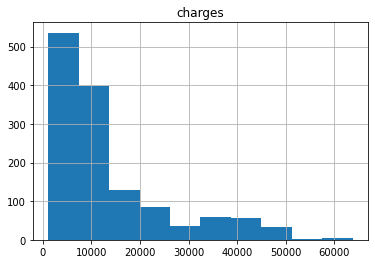

In [7]:
df.hist(column="charges")

In [8]:
df['cat'] =pd.cut( df["charges"],
                bins=[0.0, 10000, 20000, 30000, 40000, 50000, np.inf],
                labels=[1,2,3,4,5,6]
            )
            

In [9]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges cat
0      19  female  27.900         0    yes  southwest  16884.92400   2
1      18    male  33.770         1     no  southeast   1725.55230   1
2      28    male  33.000         3     no  southeast   4449.46200   1
3      33    male  22.705         0     no  northwest  21984.47061   3
4      32    male  28.880         0     no  northwest   3866.85520   1
...   ...     ...     ...       ...    ...        ...          ...  ..
1333   50    male  30.970         3     no  northwest  10600.54830   2
1334   18  female  31.920         0     no  northeast   2205.98080   1
1335   18  female  36.850         0     no  southeast   1629.83350   1
1336   21  female  25.800         0     no  southwest   2007.94500   1
1337   61  female  29.070         0    yes  northwest  29141.36030   3

[1338 rows x 8 columns]>

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train_index,test_index in split.split(df, df["cat"]):
    strat_train_set = df.loc[train_index].drop(["cat"],axis=1)
    strat_test_set = df.loc[test_index].drop(["cat"],axis=1)

In [13]:
strat_train_set

,age,sex,bmi,children,smoker,region,charges
893,47,male,38.940,2,yes,southeast,44202.65360
602,56,female,25.300,0,no,southwest,11070.53500
477,25,male,35.625,0,no,northwest,2534.39375
598,43,male,32.600,2,no,southwest,7441.50100
984,20,male,30.115,5,no,northeast,4915.05985
...,...,...,...,...,...,...,...
762,33,male,27.100,1,yes,southwest,19040.87600
1282,18,female,21.660,0,yes,northeast,14283.45940
296,19,male,27.700,0,yes,southwest,16297.84600
979,36,female,29.920,0,no,southeast,4889.03680


array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

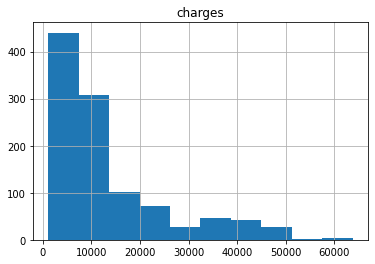

In [14]:
strat_train_set.hist(column="charges")

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

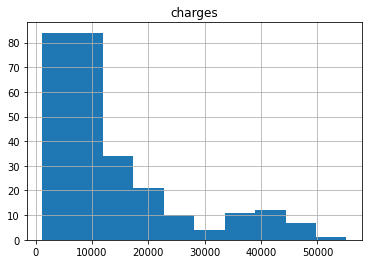

In [15]:
strat_test_set.hist(column="charges")

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'cat'], dtype='object')

In [17]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges cat
0      19  female  27.900         0    yes  southwest  16884.92400   2
1      18    male  33.770         1     no  southeast   1725.55230   1
2      28    male  33.000         3     no  southeast   4449.46200   1
3      33    male  22.705         0     no  northwest  21984.47061   3
4      32    male  28.880         0     no  northwest   3866.85520   1
...   ...     ...     ...       ...    ...        ...          ...  ..
1333   50    male  30.970         3     no  northwest  10600.54830   2
1334   18  female  31.920         0     no  northeast   2205.98080   1
1335   18  female  36.850         0     no  southeast   1629.83350   1
1336   21  female  25.800         0     no  southwest   2007.94500   1
1337   61  female  29.070         0    yes  northwest  29141.36030   3

[1338 rows x 8 columns]>

In [19]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

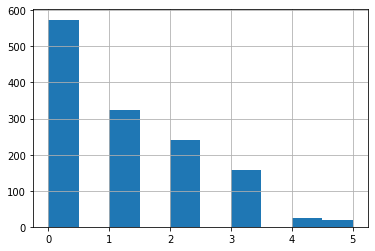

In [15]:
df['children'].hist()

In [8]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [9]:
remove_outliers(df,["bmi"],3)

Working on column: bmi


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df = pd.read_csv(r"../insuranceprediction/artifact/data_ingestion/2022-07-11-12-20-29/raw_data/Medical_Cost.csv")

In [12]:
df.shape

(1338, 7)

In [13]:
remove_outliers(df,["bmi"],3)

Working on column: bmi


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
remove_outliers(df,["children"],3)

Working on column: children


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df["children"].count().

TypeError: You have to supply one of 'by' and 'level'